<style>
div.prompt {display:none}
</style>

# Analyse de la variance à un et deux facteurs 

Nous allons utiliser des données de la library faraway.

In [164]:
library(faraway)

## Analyse de la variance à un facteur

Les données utilisée ici sont les données "coagulation".

coagulation {faraway},R Documentation


The following objects are masked from coagulation (pos = 3):

    coag, diet



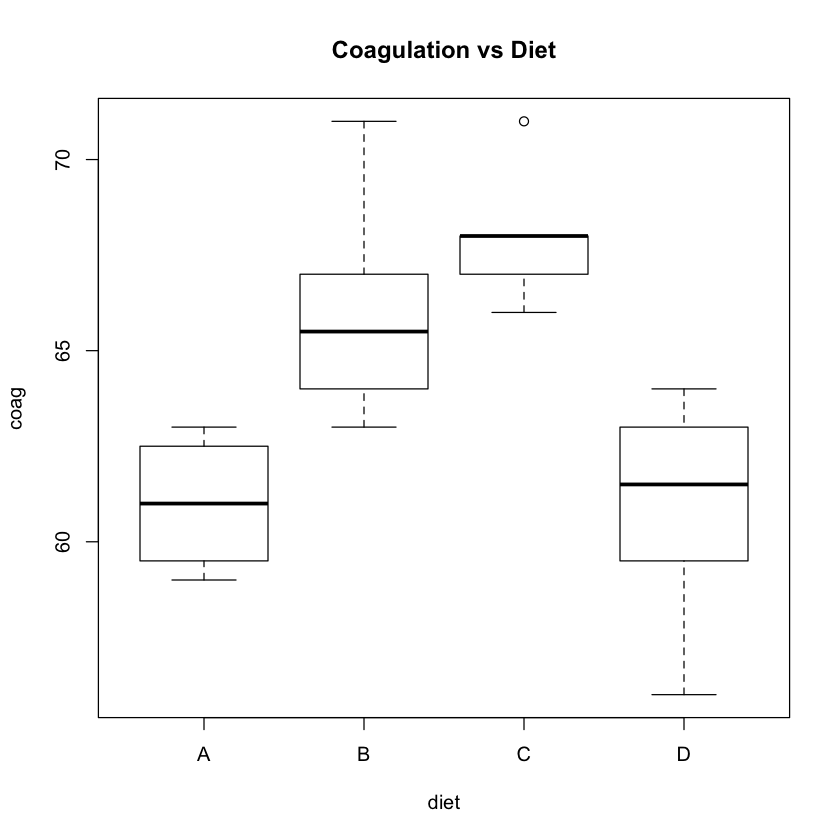

In [165]:
?coagulation
attach(coagulation)
plot(coag ~ diet,main = "Coagulation vs Diet")

## Nous voulons répondre à la question : le temps de coagulation est-il différent suivant le régime (diet) suivi ?

Nous estimons dans le modèle linéaire.

In [166]:
lm1 = lm(coag ~ diet)
summary(lm1)


Call:
lm(formula = coag ~ diet)

Residuals:
   Min     1Q Median     3Q    Max 
 -5.00  -1.25   0.00   1.25   5.00 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 6.100e+01  1.183e+00  51.554  < 2e-16 ***
dietB       5.000e+00  1.528e+00   3.273 0.003803 ** 
dietC       7.000e+00  1.528e+00   4.583 0.000181 ***
dietD       2.991e-15  1.449e+00   0.000 1.000000    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.366 on 20 degrees of freedom
Multiple R-squared:  0.6706,	Adjusted R-squared:  0.6212 
F-statistic: 13.57 on 3 and 20 DF,  p-value: 4.658e-05


### Question 1 : Dans l'écriture classique $Y = X \beta + \varepsilon$. Quelle matrice $X$ R a-t-il utilisé, donner ses premières lignes ? 

#### Solution :

Par la fonction ```model.matrix()```, on peut voir que :

In [167]:
model.matrix(lm1)[1:10,]

,(Intercept),dietB,dietC,dietD
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
5,1,1,0,0
6,1,1,0,0
7,1,1,0,0
8,1,1,0,0
9,1,1,0,0
10,1,1,0,0


##### Pour R :

$$Y = [\mathbb{1}_{\cdot},\mathbb{1}_{B} ,\mathbb{1}_{C},\mathbb{1}_{D}] \cdot \beta + \varepsilon$$

où $\beta' = [\mu,\alpha_B,\alpha_C,\alpha_D]^T; \forall i \in \{B,C,D\},\alpha_i$ est la moyenne du temps de coagulation pour le régime i. et $\mu$ est la moyenne commune.

De plus,

$\mathbb{1}_{\cdot} = [1,1,1,1,1,\dotsc,1]^T ;$ 

$\mathbb{1}_{B} = [0,0,0,0,1,1,1,1,1,1,0,\dotsc,0]^T$, etc.

### Question 2 : Quel est le temps de coagulation estimé pour le régime A et pour le régime C ?

#### Solution :
Le temps de coagulation estimé pour le régime A est $\bar Y_{A\cdot}$ :

In [168]:
mean(coagulation[coagulation$diet=='A',]$coag)
#On peur aussi untiliser le modèle lm1 :
print(lm1$coefficients[1])

[1] 61

(Intercept) 
         61 


De même, le temps de coagulation estimé pour le régime C est $\bar Y_{C\cdot}$ :

In [169]:
mean(coagulation[coagulation$diet=='C',]$coag)
print(lm1$coefficients[1]+lm1$coefficients[3])

[1] 68

(Intercept) 
         68 


### Question 3 : Quels diagnostics du modèle linéaire faut-il faire dans ce cas ?

#### Solution :

On va faire les diagnostics sur les résidus :

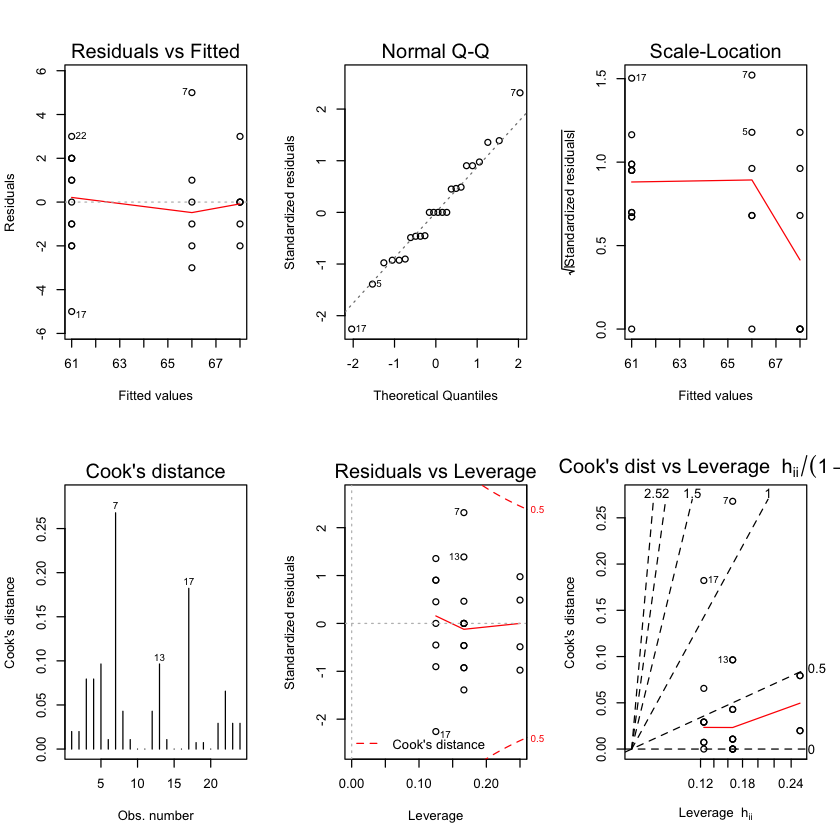

In [170]:
par(mfrow=c(2,3))
plot (lm1,which=1:6)

        7        17 
 2.636517 -2.550853 


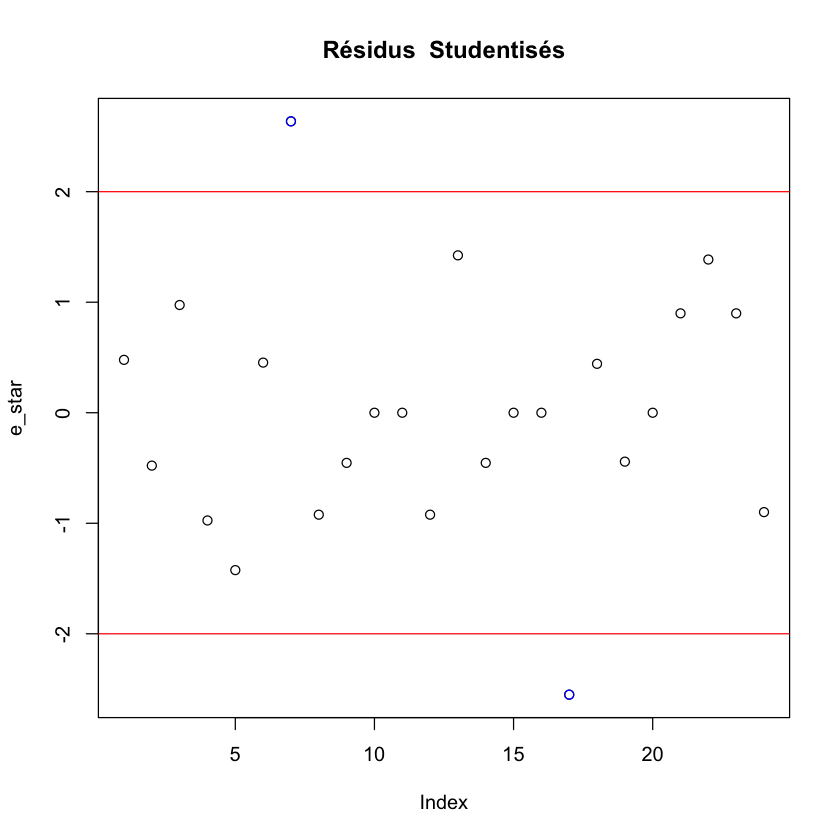

In [171]:
e_star = rstudent(lm1) 
#print(rownames(coagulation)[abs(e_star) > 2])
print(e_star[abs(e_star) > 2])

plot(e_star,main="Résidus  Studentisés")
abline(h=2,col="red")
abline(h=-2,col="red")
points(rownames(coagulation)[abs(e_star) > 2],e_star[c(7,17)],col="blue")

In [172]:
#pour la leverage
influences = lm.influence(lm1)
hat = influences$hat
cutoff = (2 * 4)/ 24 
print(rownames(coagulation)[hat > cutoff])

character(0)


Par les diagnostics, on enlève 7 et 17, qui ont des grands résidus studentisés et distance de Cook(  > 4/n).


Call:
lm(formula = coag ~ diet, data = coagulation_selected)

Residuals:
   Min     1Q Median     3Q    Max 
-2.714 -1.000  0.000  1.214  3.000 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  61.0000     0.8614  70.812  < 2e-16 ***
dietB         4.0000     1.1557   3.461  0.00279 ** 
dietC         7.0000     1.1121   6.294  6.2e-06 ***
dietD         0.7143     1.0799   0.661  0.51670    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.723 on 18 degrees of freedom
Multiple R-squared:  0.7646,	Adjusted R-squared:  0.7253 
F-statistic: 19.49 on 3 and 18 DF,  p-value: 6.947e-06


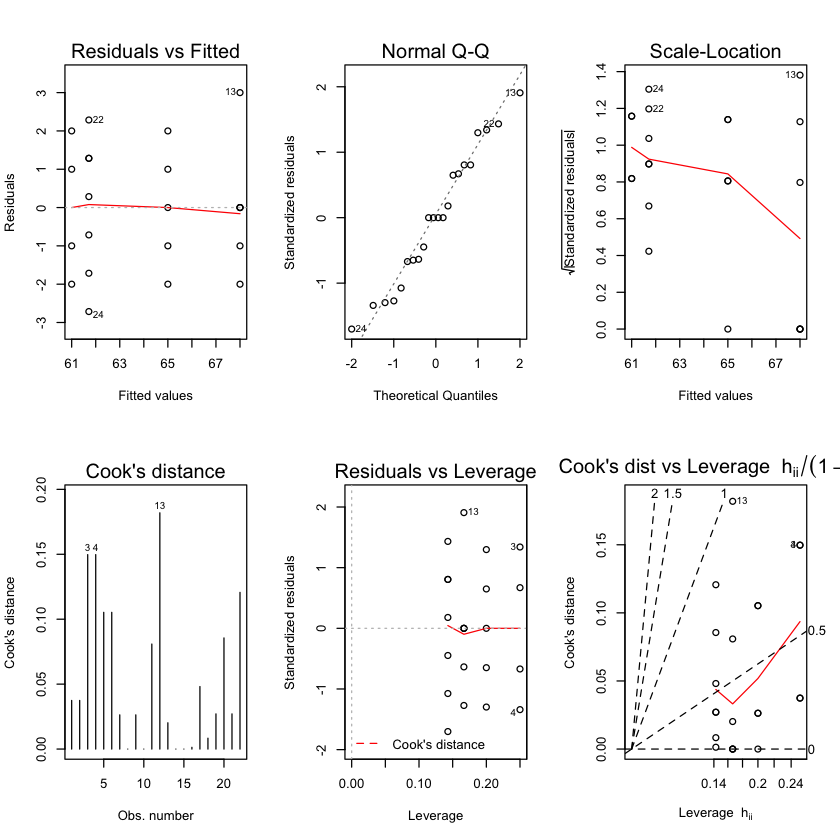

In [173]:
coagulation_selected = coagulation[-c(7,17),]
#print(coagulation_selected)
lm1_selected = lm(coag~diet,data = coagulation_selected)
summary(lm1_selected)
#lm1_selected$coefficients
par(mfrow = c(2,3))
plot(lm1_selected,which=1:6)

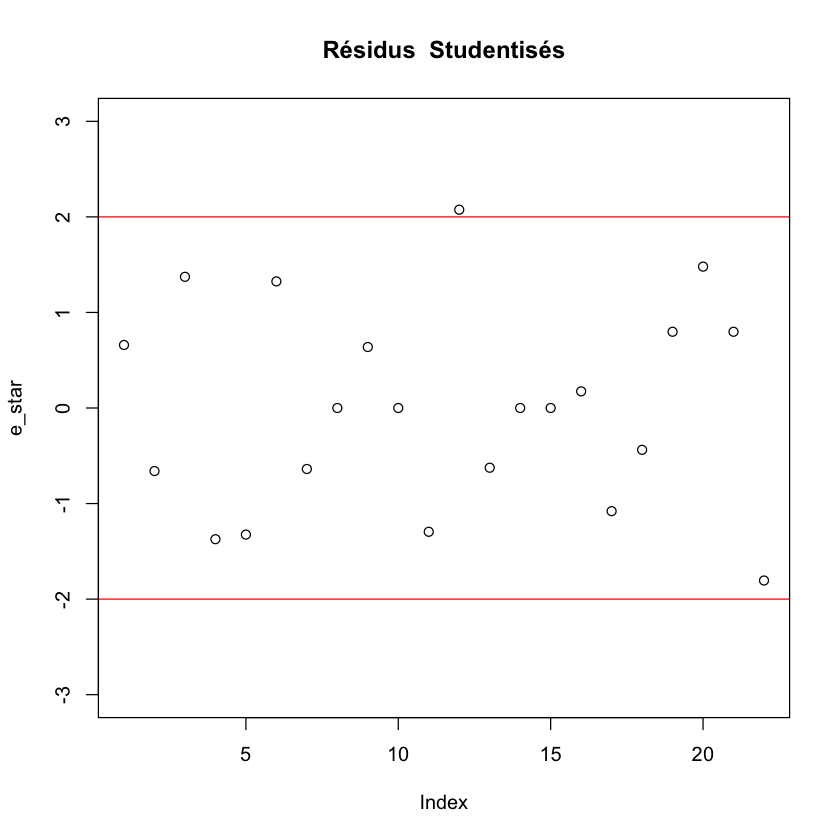

In [174]:
e_star = rstudent(lm1_selected) 
plot(e_star,main="Résidus  Studentisés",ylim=c(-3,3))
abline(h=2,col="red")
abline(h=-2,col="red")

Maintenant, il n'y a pas d'individu qui se comporte très abbérant.

### Question 4 : Y a-t-il des temps de coagulation différents suivant les régimes ? Quel test utilisez vous ?

#### Solution :
On considère un test de Fisher, on a déjà vu le p-value de test de Fisher pour le modèle lm1(4.658e-05), qui est trop petit. Alors on rejette l'hypthèse nulle. On accept l'hypthèse que les temps de coagulation différents suivant les régime.

### Question 5 : décomposition de la variance

#### a. Vérifiez que le modèle peut s'écrire sous la forme

$$ Y_{ij} = \alpha_i  + \varepsilon_{ij}, $$

où $i \in \{A,B,C,D\}$,$j \in \{1, \ldots, n_{i}\}$ avec $n_{i}$ le nombre d'observations avec la "diet" $i$.

#### Solution :
Pour ce cas :

$$Y = [\mathbb{1}_{A},\mathbb{1}_{B} ,\mathbb{1}_{C},\mathbb{1}_{D}] \cdot \beta + \varepsilon$$

où :

$\beta = [\alpha_1,\alpha_2,\alpha_3,\alpha_4]^T$; 

$\forall i \in \{A,B,C,D\},\ \alpha_i$ est la moyenne du temps de coagulation pour le régime i.

$\varepsilon = [\varepsilon_{A1},\dotsc,\varepsilon_{ij},\dotsc,\varepsilon_{D8}]^T$

et $\mathbb{1}_{A} = [1,1,1,1,0,\dotsc,0]^T ;$

$\mathbb{1}_{B} = [0,0,0,0,1,1,1,1,1,1,0,\dotsc,0]^T$, etc.

#### b. Montrer alors que la somme des carrés décomposent de la façon suivante  

$$\frac1n \sum_{i,j} (Y_{ij} - \bar Y_{\cdot\cdot})^2 = \frac1n\sum_{i \in \{A,B,C,D\}} n_{i}(\bar Y_{i\cdot} -\bar Y_{\cdot\cdot} )^2 +\frac1n\sum_{i,j} (Y_{ij} - \bar Y_{i\cdot})^2$$ 

avec $\bar{Y_{\cdot\cdot}} = \frac{1}{n} \sum_{i,j} Y_{ij}$, $\bar{Y_{i\cdot}} = \frac{1}{n} \sum_{j = 1}^{n_i} Y_{ij}$ Le premier terme est appelé variance inter-classes, le second variance intra-classes.

#### Solution :

Par le Pythagore et le théorème de Cochran, on a : 

$$\mathrm{Vect}(\mathbb{1}_{\cdot})^{\perp} = \mathrm{Vect}(\mathbb{1}_{A
},\mathbb{1}_{B},\mathbb{1}_{C},\mathbb{1}_{D})^{\perp} \overset{\perp}{\oplus} \mathrm{Vect}(\mathbb{1}_{\cdot})^{\perp\mathrm{Vect}(\mathbb{1}_{A},\mathbb{1}_{B},\mathbb{1}_{C},\mathbb{1}_{D})}$$

alors,

\begin{equation}
\begin{aligned}
\frac1n \sum_{i,j} (Y_{ij} - \bar Y_{\cdot})^2 
      & =\frac1n {||\mathrm{P}^{\perp}_{\mathrm{Vect}(\mathbb{1}_{\cdot})^{\perp}} (Y)||}^2 \\
      & =\frac1n [{||\mathrm{P}_{\mathrm{Vect}(\mathbb{1}_{A},\mathbb{1}_{B},\mathbb{1}_{C},\mathbb{1}_{D})^{\perp}}^{\perp} (Y)||}^2 + {||\mathrm{P}^{\perp \mathrm{Vect}(\mathbb{1}_{A},\mathbb{1}_{B},\mathbb{1}_{C},\mathbb{1}_{D})}_{\mathrm{Vect}(\mathbb{1}_{\cdot})^{\perp}} (\mathrm{P}_{\mathrm{Vect}(\mathbb{1}_{A},\mathbb{1}_{B},\mathbb{1}_{C},\mathbb{1}_{D})}^{\perp} (Y))||}^2] \\
      & =\frac1n \sum_{i,j} [(\bar Y_{i\cdot}-\bar Y_{\cdot\cdot})^2+(Y_{ij}-\bar Y_{i\cdot})^2] \\
      & =\frac1n \sum_{i,j} (\bar Y_{i\cdot}-\bar Y_{\cdot\cdot})^2+ \frac1n \sum_{i,j} (Y_{ij}-\bar Y_{i\cdot})^2 \\
      & =\frac1n\sum_{i \in \{A,B,C,D\}} n_{i}(\bar Y_{i\cdot} -\bar Y_{\cdot\cdot} )^2 +\frac1n\sum_{i,j} (Y_{ij} - \bar Y_{i\cdot})^2
\end{aligned}
\end{equation}

### Test de Levene d'homogénéité des variances

 Plaçons nous dans le modèle hétéroscédastique :
 
$$ Y = \beta_1 + \beta_2 I(Diet = B) + \beta_3 I(Diet = C) + \beta_4 I(Diet = D) +(\sigma_1 I(Diet = A) + \sigma_2 I(Diet = B) + \sigma_3 I(Diet = C) + \sigma_4 I(Diet = D) ) \varepsilon, $$

où $\varepsilon$ est gaussien standard. On note $e_i$ le résidu de l'observation $i$.

### Question 6 : Quelle est la loi (et l'espérance) de

$$|e_i| / \sqrt{1-H_{ii}}$$

### dans le modèle précédent ? Consultez cette page https://fr.wikipedia.org/wiki/Loi_normale_repliée pour éviter certains calculs.

#### Solution :

Par le calcul du cours, on a :

$$\mathbb{V}(e_i) = \sigma^2(1-H_{ii})$$

alors,

$$\frac{e_i}{\sqrt{1-H_{ii}}} \sim \mathcal{N}(0,\sigma^2)$$

et $\frac{|e_i|}{\sqrt{1-H_{ii}}}$ suit une lois normale repliée.

donc, dans le modèle hétérpscédastique :

pour $\forall k \in \{A,B,C,D\}$, si $e_i$ est résidu pour le diet k : 

$$\mathbb{E}(\frac{|e_i|}{\sqrt{1-H_{ii}}}) = \sigma_k\sqrt{\frac{2}{\pi}}$$

$$\mathbb{V}(\frac{|e_i|}{\sqrt{1-H_{ii}}}) = \sigma_k^2(1-\frac{2}{\pi})$$



### Question 7 : Le test de Levene consiste à faire un test de Fisher dans le modèle linéaire où l'on régresse les valeurs absolues des résidus standardisés sur la variable "Diet". Concluez vous à l'égalité des variances ?

#### Solution :


In [175]:
e = rstandard(lm1_selected)
e_abs = abs(e)
lm_levene = lm(e_abs ~ coagulation_selected$diet)
summary(lm_levene)


Call:
lm(formula = e_abs ~ coagulation_selected$diet)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.7787 -0.4388 -0.1152  0.4676  1.2717 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)   
(Intercept)                 1.00533    0.30181   3.331  0.00372 **
coagulation_selected$dietB -0.22661    0.40492  -0.560  0.58263   
coagulation_selected$dietC -0.36950    0.38964  -0.948  0.35552   
coagulation_selected$dietD -0.08412    0.37834  -0.222  0.82655   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6036 on 18 degrees of freedom
Multiple R-squared:  0.06022,	Adjusted R-squared:  -0.09641 
F-statistic: 0.3845 on 3 and 18 DF,  p-value: 0.7655


#### Conclusion :

On peut voir dans le summary que la p-value de F-test égale à 0.7655, donc on conserve l'hypothèse nulle. C'est-à-dire que les variances de groupes différents $\sigma_k^2$ sont égaux.


# Analyse de la variance à deux facteurs (en plan complet)

The following objects are masked from rats (pos = 5):

    poison, time, treat

The following objects are masked from rats (pos = 6):

    poison, time, treat



rats {faraway},R Documentation


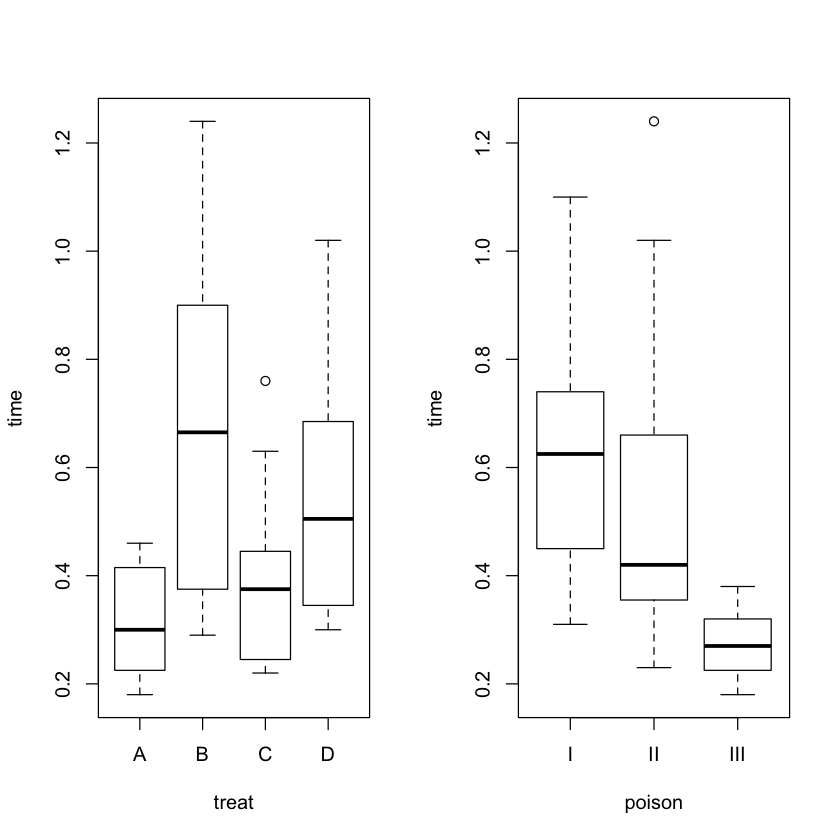

In [176]:
attach(rats)
?rats
par(mfrow=c(1,2))
plot(time ~ treat + poison)

### Question 1 : on fait un premier modèle avec "poison" et "treat". Vérifiez la normalité des résidus. Représentez les résidus studentisés contre les valeurs ajustées. Que concluez vous ? Essayez les transformations $log$ et $1/$?

#### Solution :


Call:
lm(formula = time ~ treat + poison)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.25167 -0.09625 -0.01490  0.06177  0.49833 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.45229    0.05592   8.088 4.22e-10 ***
treatB       0.36250    0.06458   5.614 1.43e-06 ***
treatC       0.07833    0.06458   1.213  0.23189    
treatD       0.22000    0.06458   3.407  0.00146 ** 
poisonII    -0.07312    0.05592  -1.308  0.19813    
poisonIII   -0.34125    0.05592  -6.102 2.83e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1582 on 42 degrees of freedom
Multiple R-squared:  0.6503,	Adjusted R-squared:  0.6087 
F-statistic: 15.62 on 5 and 42 DF,  p-value: 1.123e-08


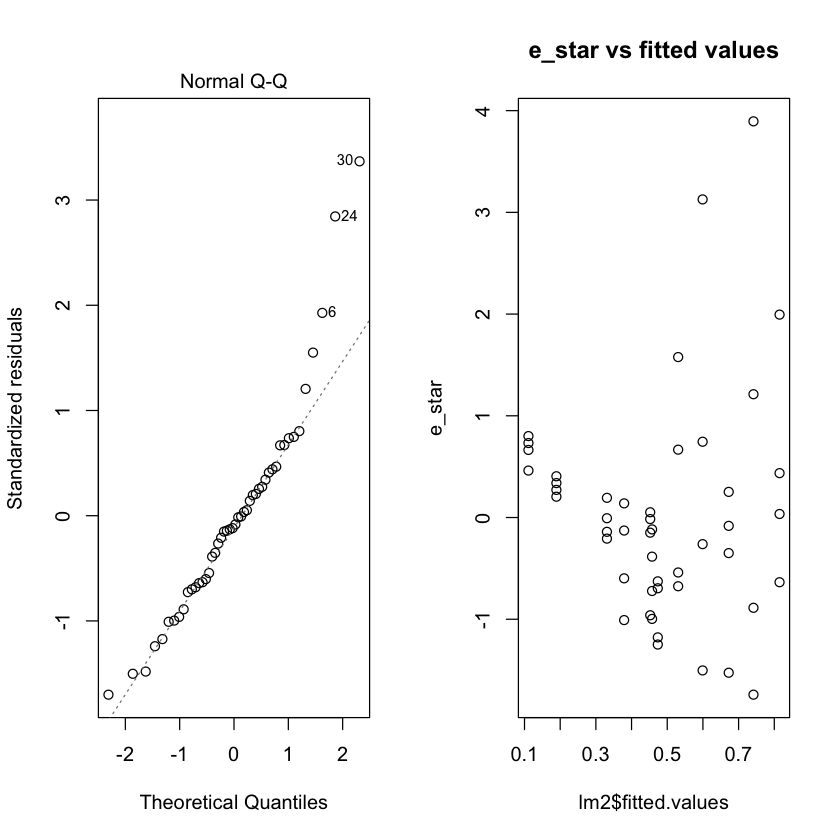

In [177]:
lm2 <- lm(time ~ treat + poison)
summary(lm2)
par(mfrow=c(1,2))
plot(lm2,which=2)
#Studentized residual
e_star=rstudent(lm2)
# plot(e_star,main="Résidus Studentisés",ylim=c(-5,5))
# abline(h=2,col="red")
# abline(h=-2,col="red")
# points(rownames(rats)[abs(e_star) > 2],e_star[abs(e_star) > 2],col="blue")
#e_star vs les valeurs ajustées : pour tester l'indépendance. 
plot(lm2$fitted.values,e_star,main="e_star vs fitted values")


#### Conclusion :
Les résidus studentisés contre les valeurs ajustées doivent être décorrélées si les $\varepsilon_i$ sont indépendantes.

Mais, on a vu une corrélation légère sur le plot. 

#### Pour les transformations log et 1/ :

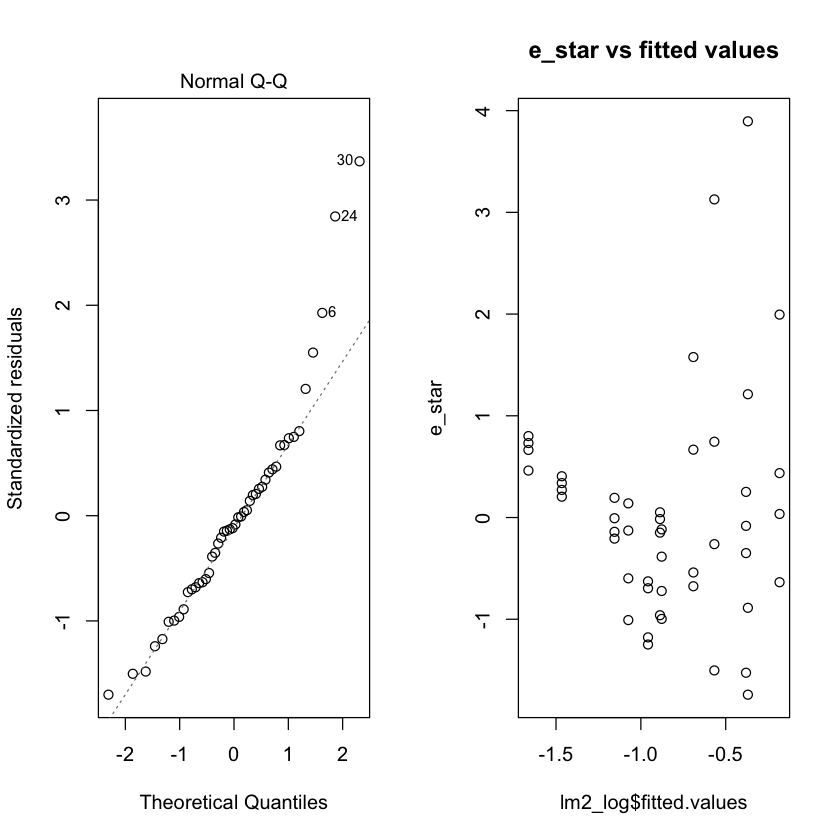

In [178]:
#log
lm2_log <- lm(log(time) ~ treat + poison)
par(mfrow=c(1,2))
plot(lm2,which=2)
plot(lm2_log$fitted.values,e_star,main="e_star vs fitted values")

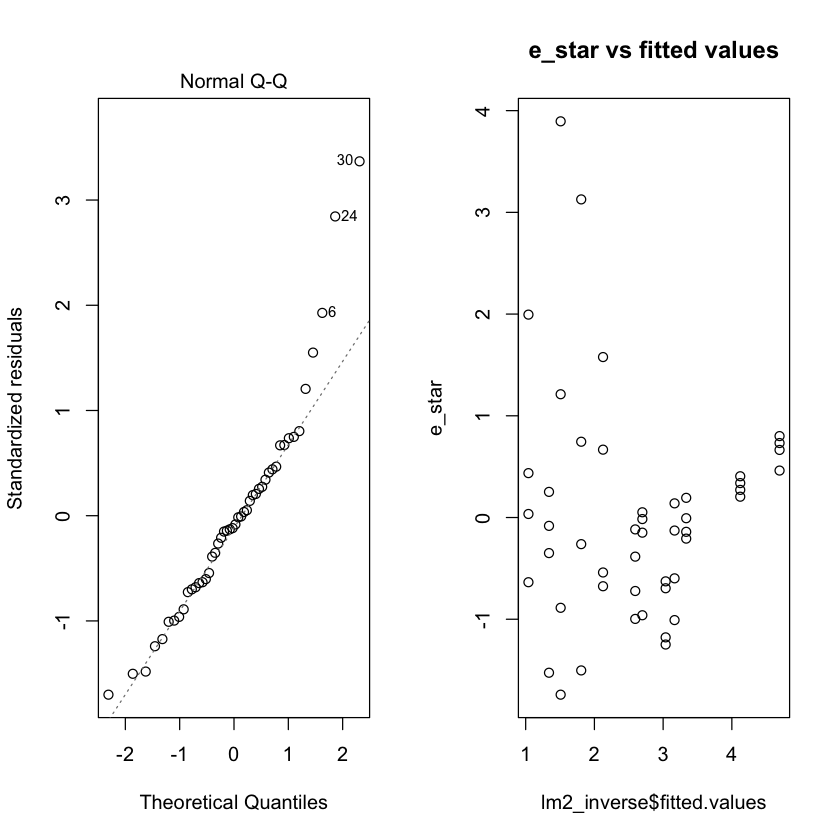

In [179]:
#1/
lm2_inverse <- lm(1/time ~ treat + poison)
par(mfrow=c(1,2))
plot(lm2,which=2)
plot(lm2_inverse$fitted.values,e_star,main="e_star vs fitted values")

#### Conclusion :
On n'a pas vu les différentes significative par rapport à décorrélation entre ces plot. C'est raisonnable, car le plot des résidus studentisés contre les valeurs ajustées est pour testes l'indépendance des $\varepsilon_i$, et les transformations de log et 1/ n'influence pas l'indépendance (dépentance).

### Question 2 : à partir de la transformation précédente, refaire l'estimation dans le modèle linéaire et tester l'influence de la variable "treat" et celle de la variable "poison".

#### Solution :

In [180]:
summary(aov(log(time) ~ treat + poison))

            Df Sum Sq Mean Sq F value   Pr(>F)    
treat        3  3.557  1.1857   21.26 1.56e-08 ***
poison       2  5.237  2.6187   46.96 1.95e-11 ***
Residuals   42  2.342  0.0558                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [181]:
summary(aov(1/time ~ treat + poison))

            Df Sum Sq Mean Sq F value   Pr(>F)    
treat        3  20.41   6.805   27.98 4.19e-10 ***
poison       2  34.88  17.439   71.71 2.86e-14 ***
Residuals   42  10.21   0.243                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

#### Conclusion : 
On peut voir que, pour les deux modèles de anova, les p-value de F-test des variables sont tous petit(inférieurs que 0.05). Alors, on accept que tous les variables ont une influence sur le modèle.

### Question 3 : qu'essaie-t-on de vérifier avec le graphique ci-dessus ? Quelle est votre conclusion ?

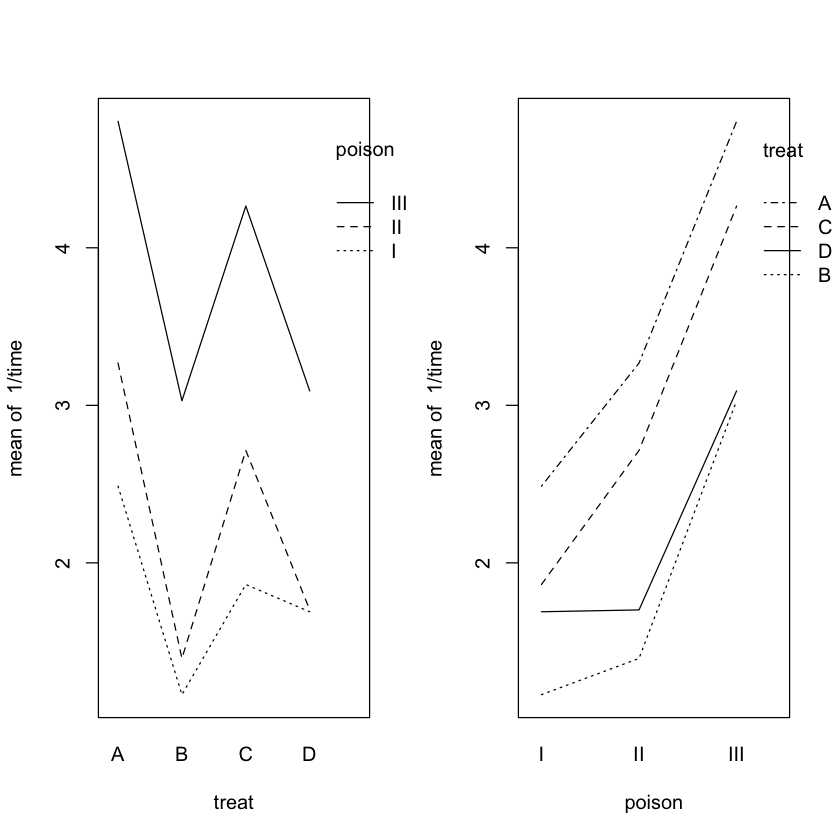

In [182]:
par(mfrow=c(1,2))
interaction.plot(treat,poison,1/time)
interaction.plot(poison,treat,1/time)

#### Conclulsion :

On vérifie que pour les poisons(resp. treat) différents, les moyennes de 1/T varient. C'est-à-dire, le type de 'poison' et 'treat' influence la valeur '1/time'. 

### Question 4 : Créer le modèle avec interaction et aficher (les premières lignes de) sa matrice de design grâce aux commandes suivantes.

In [183]:
lm_avec_inter = lm(1/time ~ treat * poison)
model.matrix(lm_avec_inter)[1:5,]

,(Intercept),treatB,treatC,treatD,poisonII,poisonIII,treatB:poisonII,treatC:poisonII,treatD:poisonII,treatB:poisonIII,treatC:poisonIII,treatD:poisonIII
1,1,0,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,0,0
3,1,0,1,0,0,0,0,0,0,0,0,0
4,1,0,0,1,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,0,0


#### Quelle est la différence estimée sur l'espérance de $1/T$ entre 
- un rat ayant eu le traitement A et le poison II et un rat ayant eu le traitement A et le poison III
- un rat ayant eu le traitement B et le poison I et un rat ayant eu le traitement C et le poison III


#### Solution :


In [184]:
summary(lm_avec_inter)


Call:
lm(formula = 1/time ~ treat * poison)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.76847 -0.29642 -0.06914  0.25458  1.07936 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       2.48688    0.24499  10.151 4.16e-12 ***
treatB           -1.32342    0.34647  -3.820 0.000508 ***
treatC           -0.62416    0.34647  -1.801 0.080010 .  
treatD           -0.79720    0.34647  -2.301 0.027297 *  
poisonII          0.78159    0.34647   2.256 0.030252 *  
poisonIII         2.31580    0.34647   6.684 8.56e-08 ***
treatB:poisonII  -0.55166    0.48999  -1.126 0.267669    
treatC:poisonII   0.06961    0.48999   0.142 0.887826    
treatD:poisonII  -0.76974    0.48999  -1.571 0.124946    
treatB:poisonIII -0.45030    0.48999  -0.919 0.364213    
treatC:poisonIII  0.08646    0.48999   0.176 0.860928    
treatD:poisonIII -0.91368    0.48999  -1.865 0.070391 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual stand

#### un rat ayant eu le traitement A et le poison II et un rat ayant eu le traitement A et le poison III :

In [185]:
rat_A_II = mean(1/rats$time[rats$treat == "A" & rats$poison=="II"])
rat_A_III = mean(1/rats$time[rats$treat == "A" & rats$poison=="III"])
rat_A_II - rat_A_III

[1] -1.534215

#### un rat ayant eu le traitement B et le poison I et un rat ayant eu le traitement C et le poison III :

In [186]:
rat_B_I = mean(1/rats$time[rats$treat == "B" & rats$poison=="I"])
rat_C_III = mean(1/rats$time[rats$treat == "C" & rats$poison=="III"])
rat_B_I - rat_C_III

[1] -3.101523

#### Remarque : 

On peut aussi utiliser le 'lm_avec_inter' ou la fonction 'predict' pour calculer les valeurs estimées.

In [187]:
#pour rat_A_II :
lm_avec_inter$fitted.values[rats$treat == "A" & rats$poison=="II"]
#calcul à la main :
mean(1/rats$time[rats$treat == "A" & rats$poison=="II"])
#par la fonction prédict :
predict(lm_avec_inter,data.frame(treat = "A",poison = "II"))

17      21      25      29 
3.26847 3.26847 3.26847 3.26847

[1] 3.26847

1 
3.26847

### Question 5: Ecrire le test de Fisher qui correspond à la question "peut-on enlever le terme d'interaction ?". Quelles sont les degrés de liberté de la loi de Fisher associée. Faire ce test sur le jeu de données. Quel modèle choisissez-vous ?

#### Solution :
Il s'agit un modèle d'ANCOVA :

$$Y_{ij} = \alpha_i + \beta_j + c x_{ij};\ \ \forall i,j \in \{I,II,III\},  \{A,B,C,D\}$$

Alors, le F-test associé est de la forme :

$$\mathcal{F}(1,IJ-I-J) \ \ \ où \ \ I=3 \ et\  J=4$$

In [188]:
lm2_aov = aov(1/time ~ treat * poison)
summary(lm2_aov)

             Df Sum Sq Mean Sq F value   Pr(>F)    
treat         3  20.41   6.805   28.34 1.38e-09 ***
poison        2  34.88  17.439   72.64 2.31e-13 ***
treat:poison  6   1.57   0.262    1.09    0.387    
Residuals    36   8.64   0.240                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

#### Conclusion :
Comme le p-value de F-test pour l'hypothèse 'il n'y a pas d'interaction' est 0.387, on accept l'hypothèse nulle. C'est-à-dire, on choisit le modèle '1/time ~ treat + poison'.